#Segundo Taller Métodos Númericos


---


**Autor**: Carlos Andres Rodallega Millán

**Código**: 2071142


**Programa**: Física - 3146

**Curso**: Métodos Númericos - (111366M)


**Presentado a**: Miguel Angel Vargas Valencia

In [ ]:
#Librerias a usar en este Taller.
import numpy as np
from timeit import default_timer
from sympy.matrices import *

##Punto 1: Solución de Sistemas de Ecuaciones Lineales por Eliminación.
---
Programe una función en python que cumpla las siguientes condiciones:


1.   Input: Matriz cuadrada **A** de cualquier tamaño n × n, vector **b** de n
entradas (la matriz y vector pueden ser creados con listas o arreglos de
numpy).
2.   Output: Vector solución **x** del sistema **Ax = b**(el vector puede ser una lista o un arreglo de numpy).

3.   Deber encontrar la solución del sistema mediante reducción de Gauss-
Jordan y sustitución hacia atrás (puede utilizar los códigos desarrollados
en clase).





#### Solución 1, 2 y 3.
---
Primero, dedicamos unas lineas para crear cualquier matrix **n$_x$n**. Este código es de la misma forma que el profesor lo había planteado. Podemos ver que el rango de la matrix, lo podemos variar manualmente.


In [ ]:
n = 3
M = np.random.rand(n,n)
b = 5*n*np.random.rand(n)
alpha = 3 * n
A = np.dot(M,M.T)+alpha*np.identity(n)
#Imprimimos la Matrix M, creada.
Matrix(M)

Matrix([
[0.126511062730596, 0.563594266063769, 0.00791018505255647],
[ 0.94695911109956, 0.632721724438561,   0.765456220201627],
[0.704007412753239, 0.721145024890511,   0.622569393868124]])

Ahora, se dedican un par de líneas que ayudan a convertir el vector fila **b** en un vector columna.

In [ ]:
b.shape=(1,n)
bt=b.T
Matrix(bt)
#bt es el vector que debemos ingresar en la función.

Matrix([
[2.31977758297242],
[11.1706197278269],
[10.8132824286259]])

Ahora, escribimos la función que nos permita realizar la matrix aumentada.


In [ ]:
def matrixampl(A,b):
  A = np.array(A,dtype=float)
  AB = np.concatenate((A,b),axis=1)
  AB0 = np.copy(AB)
  return AB0

In [ ]:
#Ejemplo, la matrix aumentada calculada anteriormente.
matrixAB = matrixampl(M,bt)
Matrix(matrixAB)

Matrix([
[0.126511062730596, 0.563594266063769, 0.00791018505255647, 2.31977758297242],
[ 0.94695911109956, 0.632721724438561,   0.765456220201627, 11.1706197278269],
[0.704007412753239, 0.721145024890511,   0.622569393868124, 10.8132824286259]])

Ahora, se escribe la función que permite realizar la eliminación

In [ ]:
def eliminacion(A,b):
  A = np.array(A,dtype=float)
  AB  = np.concatenate((A,b),axis=1)
  tamano = np.shape(AB)
  n = tamano[0]
  m = tamano[1]
  # eliminación hacia adelante
  for i in range(0,n-1,1):
    pivote   = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor  = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
  return AB

In [ ]:
#Ejemplo
Eli=eliminacion(M,bt)

In [ ]:
Matrix(Eli)

Matrix([
[0.126511062730596, 0.563594266063769, 0.00791018505255647,  2.31977758297242],
[              0.0, -3.58588741292255,   0.706246996562797, -6.19335201113619],
[              0.0,               0.0,   0.102885027018865,  2.07550600344257]])

Ahora, escribimos la función que nos permita realizar la sustitución y por enden, la solución del problema.


In [ ]:
def GaussJ(A,B):
  A = np.array(A,dtype=float)
  AB  = np.concatenate((A,B),axis=1)
  AB0 = np.copy(AB)
  tamano = np.shape(AB)
  n = tamano[0]
  m = tamano[1]
  #Supongo que pivotear
  for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna  = abs(AB[i:,i])
    dondemax = np.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal 
  AB1 = np.copy(AB)
  # eliminación hacia adelante
  for i in range(0,n-1,1):
    pivote   = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor  = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
  # sustitución hacia atrás
  ultfila = n-1
  ultcolumna = m-1
  X = np.zeros(n,dtype=float)
  for i in range(ultfila,0-1,-1):
    suma = 0
    for j in range(i+1,ultcolumna,1):
        suma = suma + AB[i,j]*X[j]
    b = AB[i,ultcolumna]
    X[i] = (b-suma)/AB[i,i]
  X = np.transpose([X])
  return AB0, AB1, AB, X

Se realiza un ejemplo.

---



---



In [ ]:
#Ejemplo
ABO, AB1, AB , X =GaussJ(M,bt)

In [ ]:
#Matrix Aumentanda
matrixAB = matrixampl(M,bt)
Matrix(matrixAB)

Matrix([
[0.126511062730596, 0.563594266063769, 0.00791018505255647, 2.31977758297242],
[ 0.94695911109956, 0.632721724438561,   0.765456220201627, 11.1706197278269],
[0.704007412753239, 0.721145024890511,   0.622569393868124, 10.8132824286259]])

In [ ]:
#Solución Del Ejercicio
print('eliminación hacia adelante')
print(AB)
print('solución: ')
print(X)

eliminación hacia adelante
[[ 0.94695911  0.63272172  0.76545622 11.17061973]
 [ 0.          0.2507543   0.05349852  2.50859535]
 [ 0.          0.         -0.19656116 -3.96524051]]
solución: 
[[-8.31890063]
 [ 5.70026717]
 [20.17306175]]


### Análisis de resultados y comentarios. Punto 1
---
---


Este es uno de los puntos más importantes del taller, porque, senta las bases de los métodos iterativos, se debe reconocer la importancia de la aplicación de los métodos de eliminación y sustitución como punto de partida para posteriores desarrollos.

A pesar de que era un ejercicio desarrollado en clase, se pudo explorar más en la parte de progrmación, así, además de obtener una solución, el lector obtiene la representación visual de la matriz aumentada del sistema que vamos a resolver, la matriz después de realizar la eliminación hacia atras y, obviamente, el vector solución del sistema. 

Todas estas ayudas visuales pierden sentido cuando en nuestro sistema trabajamos con una matriz nxn y n es demasiado grande, pero, para los sistemas los problemas que representan modelos físicos, podemos mantener esta formulación.





##Punto 2: Matrices Diagonalmente Dominantes.
---
1.   Presente la demostración del Lema de Hadmard visto en clase (celdas markdown y latex).

2.   Programe una función que determine si una matriz cuadrada **A** de cualquier tamaño n × n, es diagonalmente dominante o no.

3.   Ejecute y explique cada línea del siguiente código.

```
import numpy as np
n = 10
M = np.random.rand(n,n)
b = np.random.rand(n)
alpha = 3 * n
A = np.dot(M,M.T)+alpha*np.identity(n)
```

4.   Utilice la función del inciso b, para responder: 3⁄4Qué tipo de matriz
es asignada a la variable A? (recuerde que puede utilizar la función.tolist() para convertir el array A en listas en caso de ser necesario).

5.   Utilice la función del Ejercicio 1, para solucionar el sistema **Ax = b**
con las variables denidas en el código anterior (esta será conside-
rada como la solución real de ahora en adelante).




####Solución 1:

**Lema de Hadmard**: Si **A** es estrictamente diagonalmente dominanltes entonces **A** es invertible.


**Desmotración**: La demostración se realizó por contra recíproco.

$\forall$i $\sum_{j=1}^{n}$ $a_{ij}x_{j}$=0 $\to$ $∃X_{i_0}\neq 0$ tal que

$$|x_{i_0}|=max{|X_i|: i=1,2..}$$

$$-a_{i_0i_0}X{i_0}=∑{j=1, j \neq 0}^n a{i_0j}x_j$$

$$|a_{i_0i_0}X{i_0}|\leq∑{j=1, j \neq 0}^n a{i_0j}x_j$$

$$|a_{i_0i_0}|\leq∑{j=1, j \neq 0} |a{i_0j}|\frac{|X_j|}{X{i_0}}$$

$$|a_{i_0i_0}|\leq∑{j=1, j \neq 0} |a{i_0j}|$$

Por lo tanto, A no es estrictamente diagonalmente dominante. 

Que es a lo que se que quería llegar. así, el lema queda desmostrado por contra recíproco.

####Solución 2:

In [ ]:
def matriz_dominante(m):
  valor = True
  for i in range(0,m.shape[0]):
    for j in range(0,m.shape[1]):
      if (i !=j):
        valor = (valor) & (m[i][j] != 0)
        if valor==False:
          break
  return valor

####Solución 3:

In [ ]:
import numpy as np               #Esta linea de código permite, importar la libreria numpy que es la que vamos a usar porque contiene la función .random.
n = 3                          #Este número se encarga directamente del tamaño de la matrix que vamos a crear, como es una matrix cuadrada, este n nos dice cuántas columnas y filas tendrá la matriz.
M = np.random.rand(n,n)          #Aquí, creamos una matriz de tamaño nxn, con número aleatorios entre 0 y 1, gracias a la función .rand, después de aplicar la función .ramdon
b = np.random.rand(n)            # En esta parte, creamos un vector de tamaño n, que es es vector al que igualaremos los coeficientes de nuestra matriz
alpha = 3 * n                    #Aquí, simplemente se está creando una variable que será usada en la siguiente línea.
A = np.dot(M,M.T)+alpha*np.identity(n)    #Se crea otra matrix que siempre es diagonalmente dominante.

In [ ]:
M

array([[0.51362273, 0.84471271, 0.07992298],
       [0.22912401, 0.56003114, 0.42718318],
       [0.28291234, 0.25268134, 0.22266653]])

In [ ]:
b

array([0.07844305, 0.51818838, 0.64054927])

####Solución 4:
El tipo de matriz que es A, es una matriz diagonalmente dominante, como podremos ver acontinuación ilustrada en un ejemplo.

In [ ]:
A

array([[9.98373555, 0.62489048, 0.37654952],
       [0.62489048, 9.54861816, 0.30145083],
       [0.37654952, 0.30145083, 9.19346763]])

In [ ]:
h = A.tolist()

In [ ]:
h

[[9.983735552705957, 0.6248904780977597, 0.3765495208907575],
 [0.6248904780977597, 9.548618164550792, 0.3014508256056752],
 [0.3765495208907575, 0.3014508256056752, 9.193467633148199]]

####Solución 5: 
En la parte del ejercicio 1, ya nos habíamos encargado de resolver esta parte, porque desde el inicio estuvimos trabajando con la función dada en esta parte para resolver el sistema de ecuaciones. 

### Análisis de resultados y comentarios. Punto 2
---
---


Para los métodos de iteración que veremos acontinuación, es muy importante contar con una matriz que sea diagonalmente dominantes, así, entender la formula dada por el docente es crucial para el desarrollo de los siguientes ejercicios. La aplicación del misma, que en resumidas palabras crea una matriz diagonalmente dominante nxn, nos permite tener fácilmente una matriz de cualquier rango que sea diagonalmente dominante y tan solo a un click.

Al colocar esto, en la función que habíamos desarrollado en el punto 1, es decir, hallamos la solución del sistema. Podemos observar que obtener una solución que se considera "exacta", ya que, solo está límitada por la capacidad de almacenamiento de digitos que tenga el ordenador disponible en la mantiza.

##Punto 3: Métodos Iterativos.
El objetivo de este ejercicio es comparar los métodos de Jacobi y Gauss-Seidel vistos en clase. La condición de parada de los métodos es $|| x-x^i ||_2 < 10^{-6}$, donde **x** es la solución real y $x^{(i)}$ es la solución obtenida en cada iteración $(i)$.
---

1.   Programe una función que arroje en una lista la sucesión de soluciones por cada iteración $x^{(i)}$ del método de Jacobi.

2.   Programe una función que arroje en una lista la sucesión de soluciones por cada iteración $x^{(i)}$ del método de Gauss-Seidel.

3.   Utilice las funciones de los incisos a y b para obtener las iteraciones
de cada método para el sistema **Ax = b** con la matriz y vector
definidos en el Ejercicio 2.

4.   Calcule los errores absolutos (con la norma 2, puede usar la función
np.linalg.norm de numpy) de las iteraciones para cada método y grafique de tal modo que logre visualizar la convergencia de cada método y comparar.

5.   Calcule los errores relativos (con la norma 2) de las iteraciones para cada método y grafiquelos de tal modo que logre visualizar la convergencia de cada método y comparar.

6.   Comente y análice los resultados.





### Solución 1:
Método de Jacobi

Para resolver el sistema $$ Ax=b$$
Utilizamos la iteración $$ x^{k+1}=D^{-1}(-(L+U))x^{k}+D^{-1}b = D^{-1}(-(L+U)x^{k}+b)$$



In [ ]:
#Creando la matrix a usar.
n = 10
M = np.random.rand(n,n)
b = 5*n*np.random.rand(n)
alpha = 3 * n
A = np.dot(M,M.T)+alpha*np.identity(n)
#Imprimimos la Matrix M, creada.
#print(A)

In [ ]:
#Ahora si, creando la función
                                          #Se pueden colocar algunos valores por defecto
#eps= el error para el epsilón
# N para el número de pasos.

def jacobi(A, b , x0, eps=10e-6, n=500):   
  D = np.diag(np.diag(A))
  LU = A - D
  x = x0
  for i in range(n):
    D_inv = np.linalg.inv(D)
    xtemp = x
    x = np.dot(D_inv, np.dot(-(LU),x)+b)
    #print("paso: ", i, ' -x :', x)
    if np.linalg.norm(x- xtemp) < eps:   #Norma dada, lp_2
        return x
  print("No se alcanzó la convergencia.")
  return x

In [ ]:
#Ejemplo

x0 = np.random.rand(n)
x = jacobi(A,b,x0,10**(-6),500)
print('x: ', x)
print('b calculado: ', np.dot(A,x))
print('b real: ', b)
print('Solución de numpy: ', np.linalg.solve(A,b))

x:  [-0.34513404  0.81722439  0.79707216 -0.15102896  0.14140313  0.23154063
  0.22421122  0.94881318  1.02966877  1.12081215]
b calculado:  [ 2.18661133 39.88244972 31.55004368  8.50990007 15.47373561 19.28599418
 17.43970739 39.21471274 46.48291763 49.146836  ]
b real:  [ 2.186617   39.88245626 31.5500473   8.509906   15.47374066 19.28599962
 17.43971262 39.2147174  46.48292397 49.14684236]
Solución de numpy:  [-0.34513394  0.8172245   0.79707223 -0.15102886  0.14140323  0.23154073
  0.22421132  0.94881327  1.02966888  1.12081226]


### Solución 2:
Gauss - Seidel

Para resolver el sistema por el método de Gauss, usamos la siguiente formula: $$x^{k+1}=(L+D)^{-1}(b-Ux^{k})$$

In [ ]:
#Método de Gauss - Seidel
#Ahora si, creando la función
                                          #Se pueden colocar algunos valores por defecto
#eps= el error para el epsilón
# N para el número de pasos.
import numpy as np

def Gauss_Seidel(A, b , x0, eps=10e-6, n=500):   
  D = np.diag(np.diag(A))
  LU = A - D
  x = x0
  for i in range(n):
    D_inv = np.linalg.inv(D)
    xtemp = x
    x = np.dot(np.linalg.inv(LU+ D),b-(np.dot(LU,x)))
    #print("paso: ", i, ' -x :', x)
    if np.linalg.norm(x- xtemp) < eps:   #Norma dada, lp_2
        return x
  print("No se alcanzó la convergencia.")
  return x

In [ ]:
#Ejemplo

x0 = np.random.rand(n)
x = Gauss_Seidel(A,b,x0,10**(-6),500)
print('x: ', x)
print('b calculado: ', np.dot(A,x))
print('b real: ', b)
print('Solución de numpy: ', np.linalg.solve(A,b))

x:  [-0.5807052   0.70378844  0.72868601 -0.36748676 -0.02019366  0.05442265
  0.10662432  0.85915551  0.92516435  1.02802145]
b calculado:  [-8.60911091 32.07429278 27.27778858 -1.92150719  7.40563148 10.53311677
 10.48069806 33.6011847  39.13831766 42.15327424]
b real:  [ 2.186617   39.88245626 31.5500473   8.509906   15.47374066 19.28599962
 17.43971262 39.2147174  46.48292397 49.14684236]
Solución de numpy:  [-0.34513394  0.8172245   0.79707223 -0.15102886  0.14140323  0.23154073
  0.22421132  0.94881327  1.02966888  1.12081226]


### Solución 3:
Podemos ver que este punto se solucionó inmediatamente en el anterior, porque usamos la expresión dada en el punto 2 para hallar la matriz.

### Solución 4:
Ahora, realizamos lo mismo que anteriormente habíamos realizado pero con una modificación en ambos códigos, haremos que las funciones creadas para Jacobi y Gauss, guarden en una lista la solución parcial.

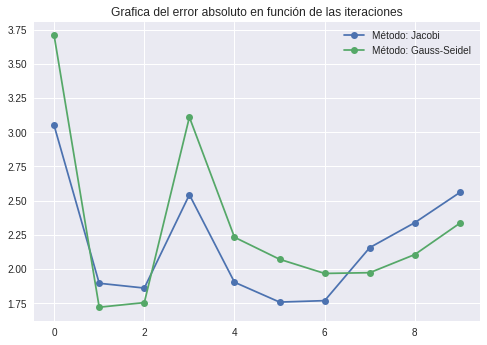

In [ ]:
#Solución

import matplotlib.pyplot as plt

x1= jacobi(A,b,x0,10**(-6),500)
x2 = Gauss_Seidel(A,b,x0,10**(-6),500)

EJ=np.zeros(len(x1))

EG= np.zeros(len(x2))

Sol = np.linalg.solve(A,b)

for i in range(len(x1)):
  EJ[i]= np.linalg.norm(Sol-x1[i])

for j in range(len(x2)):
  EG[j]= np.linalg.norm(Sol-x2[j])

plt.style.use('seaborn')
plt.plot(EJ, "o-", label= "Método: Jacobi")
plt.plot(EG, "o-", label= "Método: Gauss-Seidel")
plt.title("Grafica del error absoluto en función de las iteraciones")
plt.legend()
plt.show()

### Solución 5:
Realizamos exactament lo mismo anterior, solo que colocamos el error relativo.

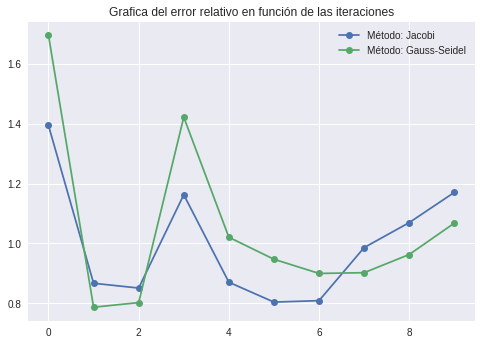

In [ ]:

x1= jacobi(A,b,x0,10**(-6),500)
x2 = Gauss_Seidel(A,b,x0,10**(-6),500)

EJ=np.zeros(len(x1))

EG= np.zeros(len(x2))

Sol = np.linalg.solve(A,b)

for i in range(len(x1)):
  EJ[i]= (np.linalg.norm(Sol-x1[i]))/(np.linalg.norm(Sol))

for j in range(len(x2)):
  EG[j]= (np.linalg.norm(Sol-x2[j]))/(np.linalg.norm(Sol))

plt.style.use('seaborn')
plt.plot(EJ, "o-", label= "Método: Jacobi")
plt.plot(EG, "o-", label= "Método: Gauss-Seidel")
plt.title("Grafica del error relativo en función de las iteraciones")
plt.legend()
plt.show()

### Análisis de resultados y comentarios. Punto 3


---



---


Ambos métodos fueron, obviamente, los más complicados de implementar en forma de código, estos métodos requieren un poco más de bagaje matematico y de programación, pero al final, pudimos observar visualmente (Al ver las graficas de los errores relativos y absolutos), que el método de Gauss-Seidel converge más rapido a la respuesta que el método de Jacobi, esto también lo vemos analíticamente, cuando intentamos a mano resolver un sistema pequeño por ambos métodos, esto se debe a que el método de Gauss utiliza la misma solución calculada en la siguiente iteración mientras el método de jacobi no hace eso.

#**Rerencias**

---



*   Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 1221). New York: Mcgraw-hill.
*   Michael T. Heath (2002). EScientific Computing: An Introductory Survey [Diapositiva de PowerPoint]. Department of Computer Science
University of Illinois at Urbana-Champaign.
*   Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.